# **Retail Customers Behaviors using KMeans Clustering**

## Workflow of the Project

- Data Collection and Loading
- Data Exploration
- Data Wrangling
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Development

### Importing the Dependencies

In [4]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Library for Warning Message
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*no associated frequency information.*")
warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed to converge.*")

# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

### Data Collection and Loading

Data Source: *https://archive.ics.uci.edu/dataset/502/online+retail+ii*

#### **Dataset Information**

Online Retail II data set contains all the transactions occurring for a UK-based and registered. he company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
<br>

**Additional Information**

<ul>
    <li>InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.</li>
    <li>StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.</li>
    <li>Description: Product (item) name. Nominal.</li>
    <li>Quantity: The quantities of each product (item) per transaction. Numeric.</li>
    <li>InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.</li>
    <li>UnitPrice: Unit price. Numeric. Product price per unit in sterling.</li>
    <li>CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.</li>
    <li>Country: Country name. Nominal. The name of the country where a customer resides.</li>
</ul>
esides.

In [8]:
# Load the data
retail_df = pd.read_excel("online_retail_II.xlsx", sheet_name = 0)

### Data Exploration

In [10]:
# View the First 10 rows of the data
retail_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [11]:
# Convert column names to lowercase and remove space for consistency and easier handling
retail_df.columns = retail_df.columns.str.lower().str.strip().str.replace(" ", "")

# View the data
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [12]:
# Dimension of the Data
print("No. of Records: {}".format(retail_df.shape[0]))
print("")
print("No. of Fields: {}".format(retail_df.shape[1]))

No. of Records: 525461

No. of Fields: 8


In [13]:
# Check the Data Types
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      525461 non-null  object        
 1   stockcode    525461 non-null  object        
 2   description  522533 non-null  object        
 3   quantity     525461 non-null  int64         
 4   invoicedate  525461 non-null  datetime64[ns]
 5   price        525461 non-null  float64       
 6   customerid   417534 non-null  float64       
 7   country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


- The data types for 'Customer ID' column is incorrect
- 'Customer ID' column has missing values (contains less data compared to the total records)

In [15]:
# Check the Description of Numeric Columns
retail_df.describe()

,quantity,invoicedate,price,customerid
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


- 'Quantity' and 'Price' columns contains negative values (min)

In [17]:
# Check the Description of Categorical Columns
retail_df.describe(include = 'O')

,invoice,stockcode,description,country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


- The distinct number from 'Stock Code' and 'Description' columns varies

In [19]:
# Check rows with missing 'Customer Id'
retail_df[retail_df.customerid.isna()]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


### Exploratory Data Analysis (EDA)

In [21]:
# Check rows with Negative 'Quantity' values
retail_df[retail_df.quantity < 0]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [22]:
# Check the 'Invoice' numbers with No Cancellation (eg: 489434)
retail_df["invoice"] = retail_df["invoice"].astype("str")
retail_df[retail_df.invoice.str.match("^\\d{6}$") == True]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [23]:
# Check the 'Invoice' number with characters before the 6-digit number (eg: C489434)
retail_df[retail_df.invoice.str.match("^\\d{6}$") == False]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


- Now, investigate whether the invoice contains any other character other than 'C' which means for cancellation

In [25]:
retail_df["invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

- Let's explore further what does this character 'A' means in invoice

In [27]:
retail_df[retail_df['invoice'].str.startswith("A")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


- Minimal number of rows only
- Customer ID is missing
- From the description of these invoices, it seems to be a bad debt
- Hence, these invoices can be excluded from our analysis

In [29]:
# Check stock code whether all the code is a 5 digit number
retail_df["stockcode"] = retail_df['stockcode'].astype('str')
retail_df[retail_df['stockcode'].str.match("^\\d{5}$") == False]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


- There are stock codes with alphanumeric values (eg: 79323P)
- In the data description, no information is available what those characters indicates
- Hence, we will consider it as valid codes

In [31]:
# Check whether there are any other unique stock codes other than the above patterns
retail_df[(retail_df['stockcode'].str.match("^\\d{5}$") == False) & (retail_df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]\
['stockcode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

Let's analyze each unique stock codes to understand whether it can be excluded from clustering. 

In [33]:
# 'POST'
retail_df[retail_df['stockcode'].str.contains("^POST")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [34]:
# 'D'
retail_df[retail_df['stockcode'].str.contains("^D$")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom
...,...,...,...,...,...,...,...,...
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.00,United Kingdom
503073,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
511955,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.00,United Kingdom
517436,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.00,United Kingdom


In [35]:
#DCGSxxxx
retail_df[(retail_df['stockcode'].str.contains("^DCGS[0-9]"))]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
442200,531489,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-08 15:02:00,2.51,NaN,United Kingdom
450081,532139,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-11-11 11:18:00,16.13,NaN,United Kingdom
466307,533348,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-17 09:23:00,2.51,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom


In [36]:
# DOT
retail_df[retail_df['stockcode'].str.contains("^DOT")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [37]:
# 'M'
retail_df[(retail_df['stockcode'].str.contains("^M")) | (retail_df['stockcode'].str.contains("^m"))]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.00,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.00,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.00,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.00,United Kingdom
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom


In [38]:
# 'C2'
retail_df[retail_df['stockcode'].str.contains("^C2")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.00,14911.00,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.00,14911.00,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.00,13369.00,United Kingdom


In [39]:
# 'C3'
retail_df[retail_df['stockcode'].str.contains("^C3")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


In [40]:
# 'BANK CHARGES'
retail_df[(retail_df['stockcode'].str.contains("^BANK CHARGES")) | (retail_df['stockcode'].str.contains("^B"))]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.00,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.00,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom


In [41]:
# 'S'
retail_df[retail_df['stockcode'].str.contains("^S")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom


In [42]:
# 'TESTxxx'
retail_df[retail_df['stockcode'].str.contains("^TEST[0-9]")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.00,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.00,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.00,United Kingdom


In [43]:
# 'gift_xxxx_xx'
retail_df[retail_df['stockcode'].str.contains("^gift_[0-9]")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
399538,527520,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-10-18 13:18:00,25.53,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom
434320,530850,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-11-04 14:49:00,25.53,NaN,United Kingdom
442201,531489,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-11-08 15:02:00,8.51,NaN,United Kingdom


In [44]:
# 'PADS'
retail_df[retail_df['stockcode'].str.contains("^PADS")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [45]:
# 'ADJUSTx'
retail_df[(retail_df['stockcode'].str.contains("^ADJUST")) | (retail_df['stockcode'].str.contains("^ADJUST[0-9]"))]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,72.45,16422.00,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.00,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom


In [46]:
# 'SP1002'
retail_df[retail_df['stockcode'].str.contains("^SP[0-9]")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [47]:
# 'AMAZONFEE'
retail_df[retail_df['stockcode'].str.contains("^AMAZONFEE")]

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


In [48]:
# '47503J '
retail_df[retail_df['stockcode'] == '47503J ']

retail_df['stockcode'] = retail_df.stockcode.replace("47503J ", "47503J")
retail_df[retail_df['stockcode'] == '47503J']

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
260886,514532,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-07-05 10:07:00,16.13,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
2981,489642,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-01 16:19:00,7.95,NaN,United Kingdom
9784,490149,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-04 09:43:00,16.48,NaN,United Kingdom
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.00,United Kingdom
20061,491041,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-09 09:42:00,16.48,NaN,United Kingdom
24867,C491446,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,-7,2009-12-11 10:47:00,7.95,14191.00,United Kingdom
...,...,...,...,...,...,...,...,...
356535,524004,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-09-26 16:06:00,7.95,15532.00,United Kingdom
496010,535803,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-11-28 14:57:00,7.95,14410.00,United Kingdom
496295,535811,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-11-28 15:18:00,7.95,15532.00,United Kingdom
509364,536945,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-12-03 12:24:00,7.95,14083.00,United Kingdom


Most of the columns have missing customer ids and seems to be invalid.
'PADS' looks like a legit stock code for padding which can be included rest all can be excluded from the analysis.

### Data Cleaning

In [51]:
# Make a copy of Original DF
cleaned_df = retail_df.copy()

In [52]:
# Keep only the Invoice with 6-digit
cleaned_df['invoice'] = cleaned_df['invoice'].astype('str')

mask = (cleaned_df["invoice"].str.match("^\\d{6}$") == True)

cleaned_df = cleaned_df[mask]

# View the Result
cleaned_df

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [53]:
# Keep only the Stock Codes with the required patterns (eg: 85048 / 79323P / PADS)
cleaned_df['stockcode'] = cleaned_df['stockcode'].astype('str')

mask = (
        (cleaned_df['stockcode'].str.match("^\\d{5}$") == True) |
        (cleaned_df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
        (cleaned_df['stockcode'].str.match("^PADS$") == True)
       )

cleaned_df = cleaned_df[mask]

# View the Result
cleaned_df

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [54]:
# Remove the NaNs from Customer Id column
cleaned_df.dropna(subset = ["customerid"], inplace = True)

# View the Result
cleaned_df

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [55]:
# Let's check the description of cleaned_df whether the negative values from Price and Quantity removed or not
cleaned_df.describe()

,quantity,invoicedate,price,customerid
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [56]:
# Investigate rows with price = 0.0
cleaned_df[cleaned_df.price == 0]

print("{} records with 0.0.".format(len(cleaned_df[cleaned_df.price == 0])))

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


28 records with 0.0.


In [57]:
# Check the minimum price
cleaned_df = cleaned_df[cleaned_df.price > 0.0]

# Check the Description again
cleaned_df.describe()

,quantity,invoicedate,price,customerid
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [58]:
# How much data we lost after cleaning
lost_percent = 1 - (len(cleaned_df) / len(retail_df))

print("After cleaning, {:.0f}% of data has been removed.".format(lost_percent*100))

After cleaning, 23% of data has been removed.


### Feature Engineering

In [60]:
# Add Sales (Quantity * Unit Price) Column
cleaned_df["sales"] = cleaned_df['quantity'] * cleaned_df['price']

# View the Result
cleaned_df.head(10)

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00


In [107]:
# Recency, Frequency, Monetary (RFM)
agg_df = cleaned_df.groupby("customerid", as_index = False)\
.agg(
        monetaryvalue = ("sales", "sum"),
        frequency = ("invoice", "nunique"),
        lastinvoicedate = ("invoicedate", "max")
    )

# View the Result
agg_df.head()

,customerid,monetaryvalue,frequency,lastinvoicedate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [111]:
max_invoice_date = agg_df['lastinvoicedate'].max()

# Recency
agg_df['recency'] = (max_invoice_date - agg_df['lastinvoicedate']).dt.days

# View the Result
agg_df.head()

,customerid,monetaryvalue,frequency,lastinvoicedate,recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


<Figure size 1500x500 with 0 Axes>

<Axes: >

(array([4.265e+03, 1.200e+01, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.5500000e+00, 3.4917830e+04, 6.9834110e+04, 1.0475039e+05,
        1.3966667e+05, 1.7458295e+05, 2.0949923e+05, 2.4441551e+05,
        2.7933179e+05, 3.1424807e+05, 3.4916435e+05]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Monetary Value Distribution')

Text(0.5, 0, 'Monetary Value')

Text(0, 0.5, 'Count')

<Axes: >

(array([4.187e+03, 6.200e+01, 1.900e+01, 6.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  19.2,  37.4,  55.6,  73.8,  92. , 110.2, 128.4, 146.6,
        164.8, 183. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Frequency Distribution')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Count')

<Axes: >

(array([1140.,  674.,  438.,  438.,  222.,  160.,  125.,  109.,   96.,
         125.,   92.,   92.,  105.,  103.,   72.,   73.,   68.,   36.,
           7.,  110.]),
 array([  0.  ,  18.65,  37.3 ,  55.95,  74.6 ,  93.25, 111.9 , 130.55,
        149.2 , 167.85, 186.5 , 205.15, 223.8 , 242.45, 261.1 , 279.75,
        298.4 , 317.05, 335.7 , 354.35, 373.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Recency Distribution')

Text(0.5, 0, 'Recency Value')

Text(0, 0.5, 'Count')

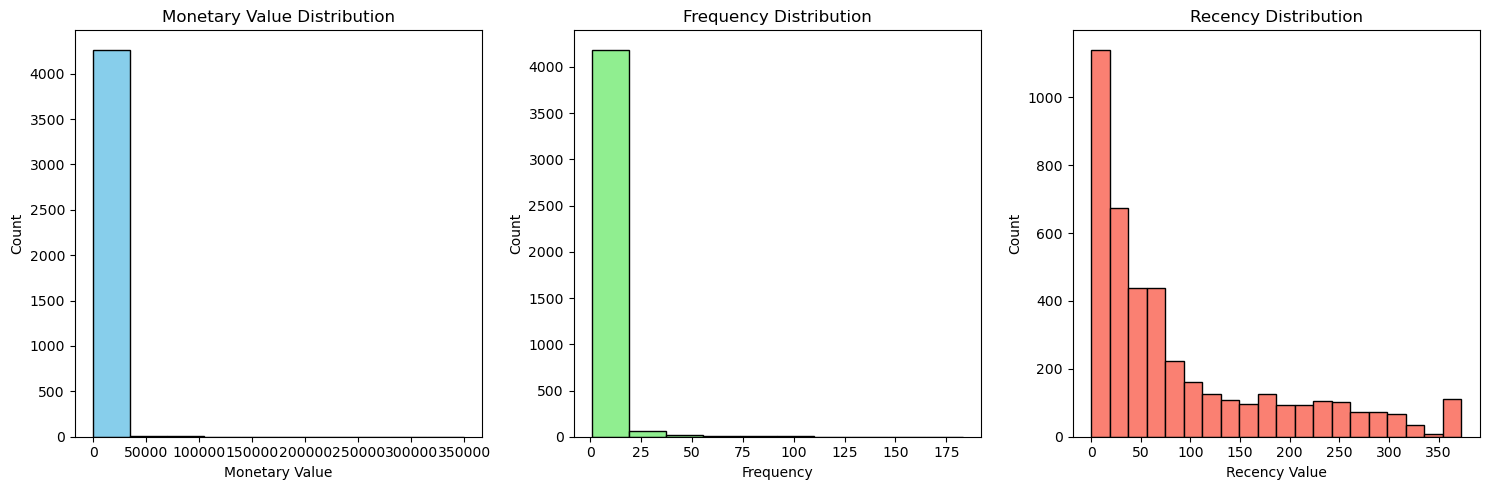

In [113]:
# Visualize the Distributions
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(agg_df['monetaryvalue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(agg_df['frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_df['recency'], bins = 20, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: >

<Axes: ylabel='monetaryvalue'>

Text(0.5, 1.0, 'Monetary Value Boxplot')

Text(0.5, 0, 'Monetary Value')

<Axes: >

<Axes: ylabel='frequency'>

Text(0.5, 1.0, 'Frequency Boxplot')

Text(0.5, 0, 'Frequency')

<Axes: >

<Axes: ylabel='recency'>

Text(0.5, 1.0, 'Recency Boxplot')

Text(0.5, 0, 'Recency Value')

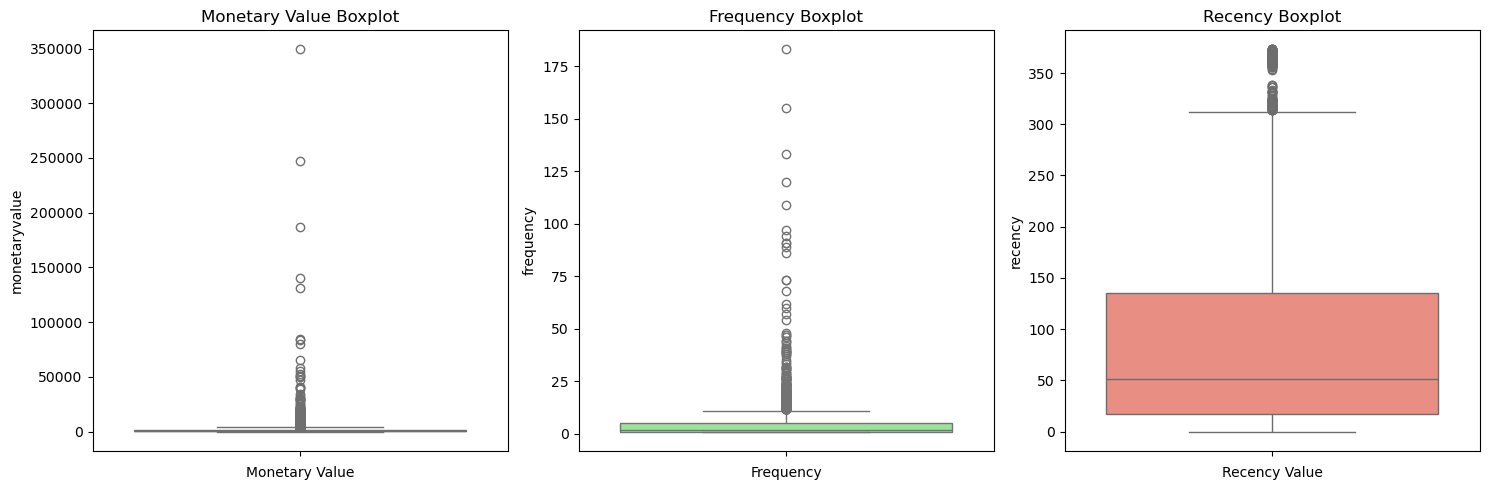

In [115]:
# Box Plot
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = agg_df['monetaryvalue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data = agg_df['frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = agg_df['recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency Value')

plt.tight_layout()
plt.show()

In [119]:
# IQR for handling outliers
# Monetary Value
m_q1 = agg_df['monetaryvalue'].quantile(0.25)
m_q3 = agg_df['monetaryvalue'].quantile(0.75)
m_iqr = m_q3 - m_q1

monetary_outliers_df = agg_df[(agg_df['monetaryvalue'] > (m_q3 + 1.5 * m_iqr)) | (agg_df['monetaryvalue'] < (m_q1 - 1.5 * m_iqr))].copy()

monetary_outliers_df.describe()

,customerid,monetaryvalue,frequency,lastinvoicedate,recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [121]:
# Frequency Value
f_q1 = agg_df['frequency'].quantile(0.25)
f_q3 = agg_df['frequency'].quantile(0.75)
f_iqr = f_q3 - f_q1

frequency_outliers_df = agg_df[(agg_df['frequency'] > (f_q3 + 1.5 * f_iqr)) | (agg_df['frequency'] < (f_q1 - 1.5 * f_iqr))].copy()

frequency_outliers_df.describe()

,customerid,monetaryvalue,frequency,lastinvoicedate,recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [123]:
# Recency Value
r_q1 = agg_df['recency'].quantile(0.25)
r_q3 = agg_df['recency'].quantile(0.75)
r_iqr = r_q3 - r_q1

recency_outliers_df = agg_df[(agg_df['recency'] > (r_q3 + 1.5 * r_iqr)) | (agg_df['recency'] < (r_q1 - 1.5 * r_iqr))].copy()

recency_outliers_df.describe()

,customerid,monetaryvalue,frequency,lastinvoicedate,recency
count,167.00,167.00,167.00,167,167.00
mean,15429.03,418.32,1.25,2009-12-23 13:52:27.664670720,350.97
min,12439.00,2.95,1.00,2009-12-01 10:49:00,314.00
25%,14115.50,147.35,1.00,2009-12-07 13:03:00,328.50
50%,15413.00,231.90,1.00,2009-12-14 15:07:00,360.00
75%,16812.00,356.18,1.00,2010-01-14 23:56:00,367.00
max,18201.00,9471.50,7.00,2010-01-29 14:22:00,373.00
std,1629.84,950.15,0.80,NaN,20.51


In [125]:
# Filter the Outliers
non_outliers_df = agg_df[(~agg_df.index.isin(monetary_outliers_df.index)) & (~agg_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,customerid,monetaryvalue,frequency,lastinvoicedate,recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


<Figure size 1500x500 with 0 Axes>

<Axes: >

<Axes: ylabel='monetaryvalue'>

Text(0.5, 1.0, 'Monetary Value Boxplot')

Text(0.5, 0, 'Monetary Value')

<Axes: >

<Axes: ylabel='frequency'>

Text(0.5, 1.0, 'Frequency Boxplot')

Text(0.5, 0, 'Frequency')

<Axes: >

<Axes: ylabel='recency'>

Text(0.5, 1.0, 'Recency Boxplot')

Text(0.5, 0, 'Recency Value')

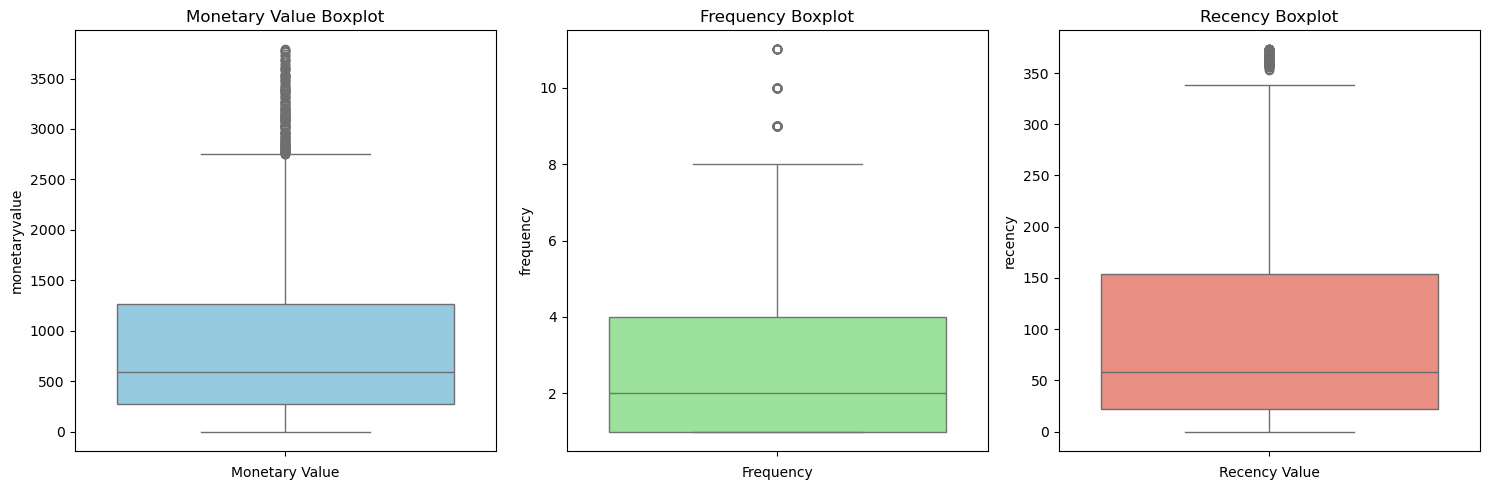

In [127]:
# Box Plot
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = non_outliers_df['monetaryvalue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data = non_outliers_df['frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = non_outliers_df['recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency Value')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Monetary Value')

Text(0.5, 0.5, 'Frequency')

Text(0.5, 0, 'Recency')

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

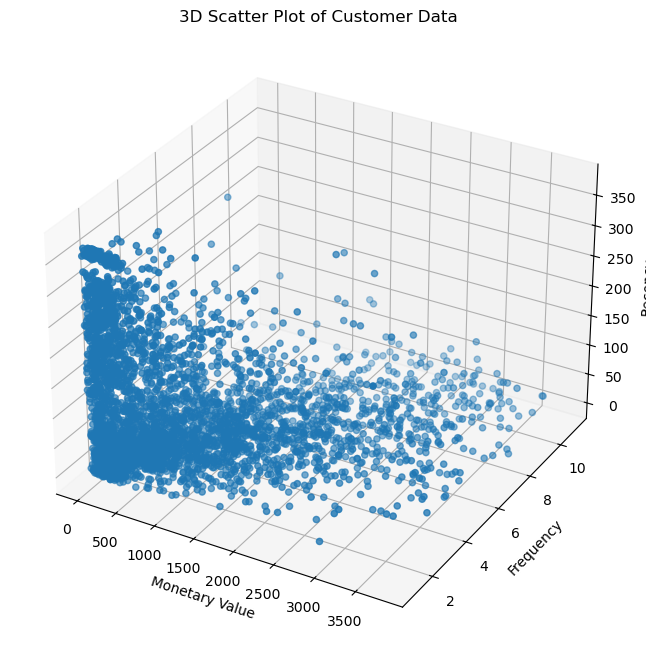

In [131]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_df['monetaryvalue'], non_outliers_df['frequency'], non_outliers_df['recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

In [133]:
# Scale the Data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['monetaryvalue', 'frequency', 'recency']])

# View the Scaled Data
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [135]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ('monetaryvalue', 'frequency', 'recency'))

# View the result
scaled_data_df

,monetaryvalue,frequency,recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


Text(0.5, 0, 'Monetary Value')

Text(0.5, 0.5, 'Frequency')

Text(0.5, 0, 'Recency')

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

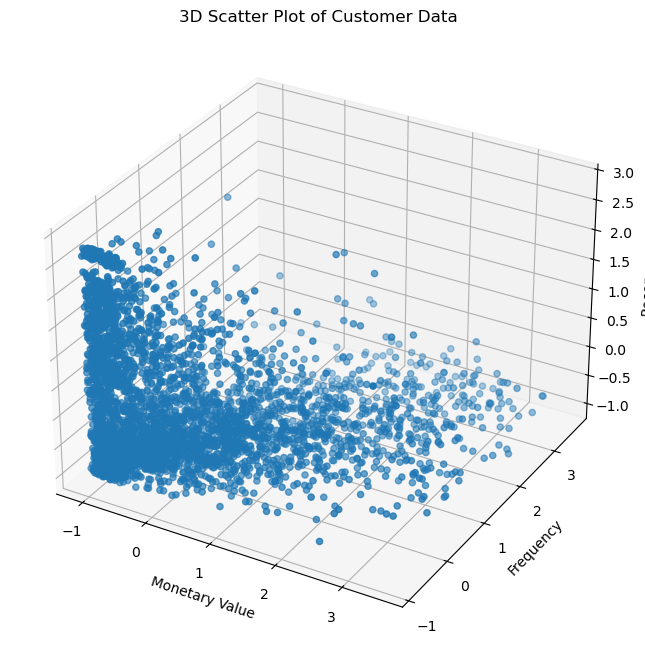

In [137]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df['monetaryvalue'], scaled_data_df['frequency'], scaled_data_df['recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

### Model Development

#### **KMeans Clustering**

**Elbow Chart**

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

array([1, 2, 2, ..., 1, 2, 0], dtype=int32)

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

array([1, 4, 2, ..., 1, 4, 0], dtype=int32)

array([1, 0, 2, ..., 1, 0, 5], dtype=int32)

array([1, 0, 2, ..., 6, 0, 5], dtype=int32)

array([7, 4, 1, ..., 2, 4, 0], dtype=int32)

array([7, 4, 1, ..., 2, 0, 8], dtype=int32)

array([9, 6, 1, ..., 2, 6, 0], dtype=int32)

array([ 1,  6, 10, ...,  2,  6,  0], dtype=int32)

array([ 9,  6, 10, ...,  2,  1,  0], dtype=int32)

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'KMeans Inertia for Different Values of K')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Inertia')

([<matplotlib.axis.XTick at 0x16e4034d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

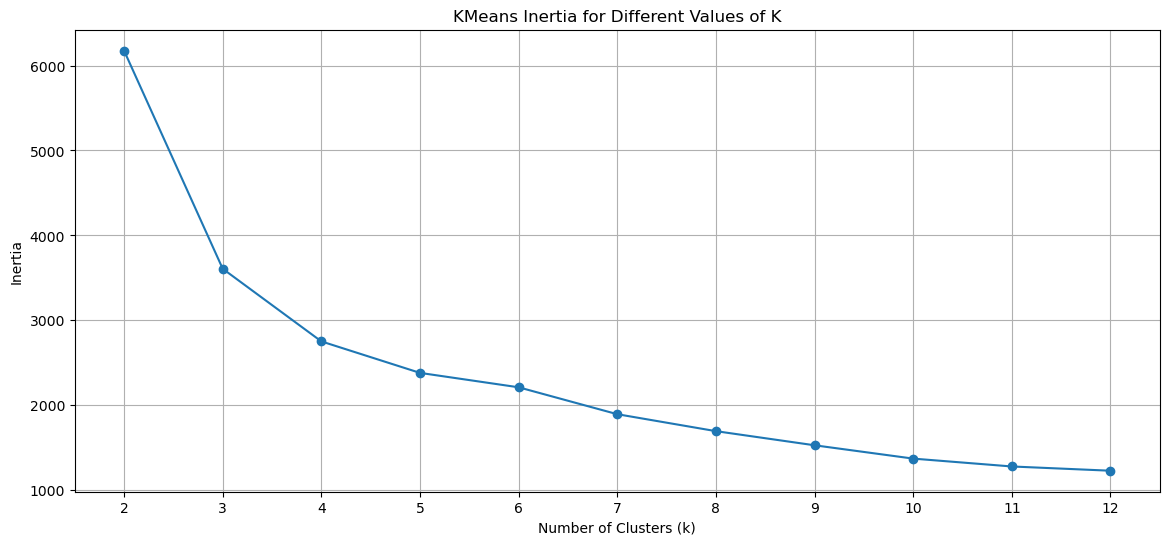

In [141]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14, 6))
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Silhouette Score**

<Figure size 1400x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'KMeans Inertia for Different Values of K')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Inertia')

([<matplotlib.axis.XTick at 0x16e5a26f0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

<Axes: >

Text(0.5, 1.0, 'Silhouette Scores for Different Values of K')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Scores')

([<matplotlib.axis.XTick at 0x16e5f5a30>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

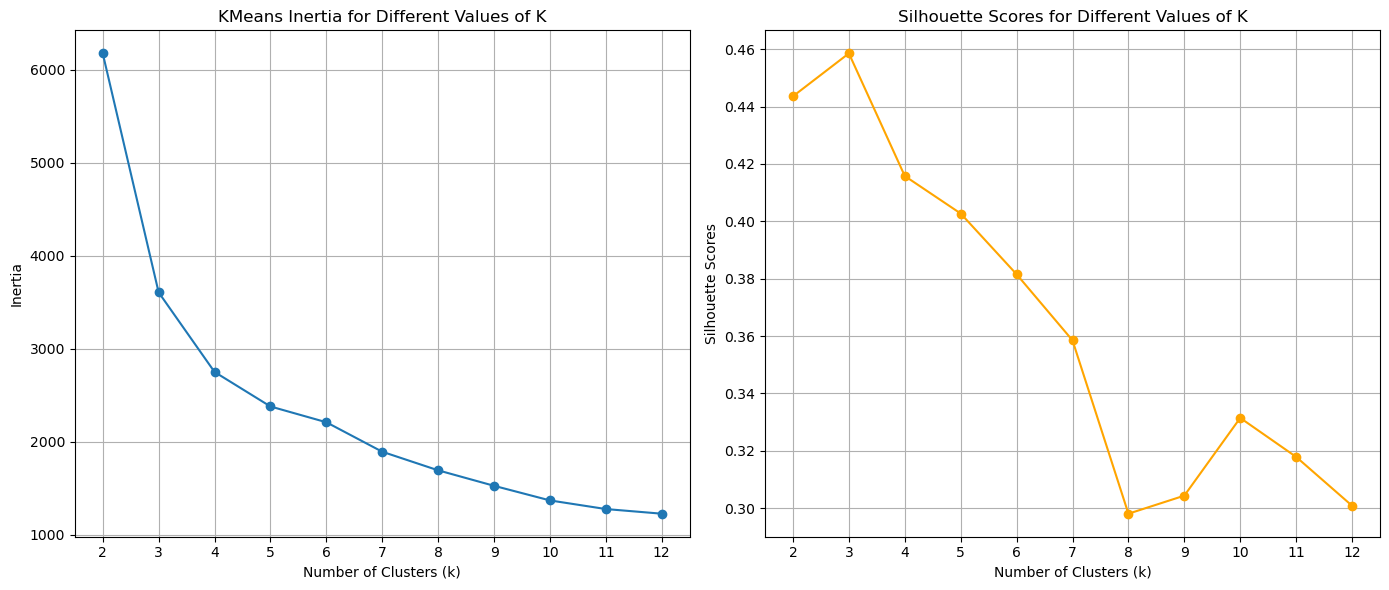

In [145]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_scores = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_scores)

    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'orange')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [147]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [149]:
# Add clusters to the Dataframe to see which customers belongs to which clusters
non_outliers_df['cluster'] = cluster_labels

non_outliers_df

,customerid,monetaryvalue,frequency,lastinvoicedate,recency,cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


Text(0.5, 0, 'Monetary Value')

Text(0.5, 0.5, 'Frequency')

Text(0.5, 0, 'Recency')

Text(0.5, 0.92, '3D Scatter Plot of Customer Data by Cluster')

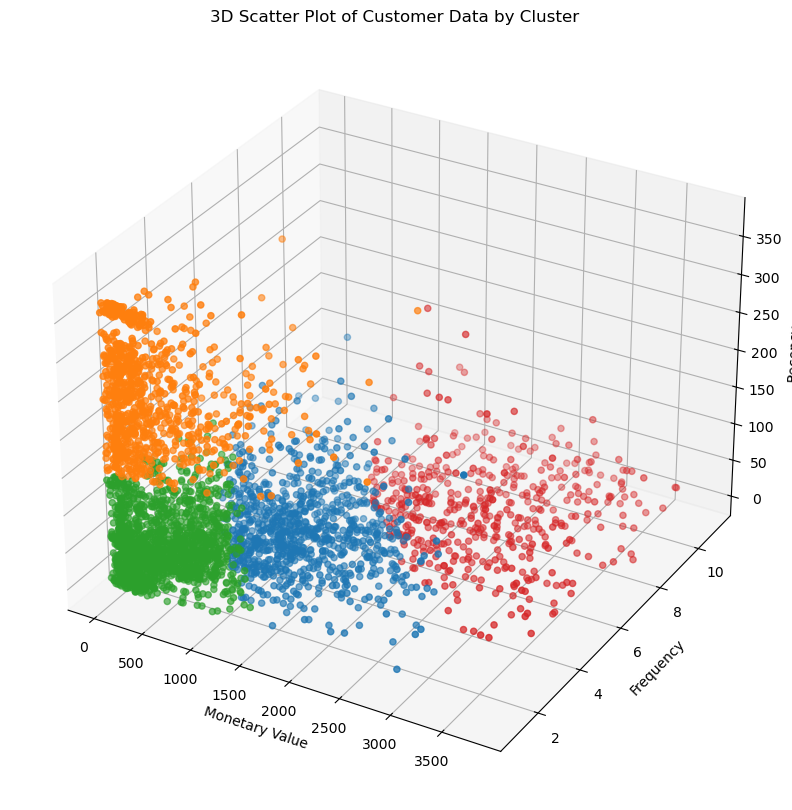

In [155]:
# Visualize
cluster_colors = {
                    0 : '#1f77b4',
                    1 : '#ff7f0e',
                    2 : '#2ca02c',
                    3 : '#d62728'
                }

colors = non_outliers_df['cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(
                        non_outliers_df['monetaryvalue'],
                        non_outliers_df['frequency'],
                        non_outliers_df['recency'],
                        c = colors,
                        marker = 'o'
                    )
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

<Figure size 1200x1800 with 0 Axes>

<Axes: >

<Axes: xlabel='cluster', ylabel='monetaryvalue'>

<Axes: xlabel='cluster', ylabel='monetaryvalue'>

Text(0.5, 1.0, 'Monetary Value by Cluster')

Text(0, 0.5, 'Monetary Value')

<Axes: >

<Axes: xlabel='cluster', ylabel='frequency'>

<Axes: xlabel='cluster', ylabel='frequency'>

Text(0.5, 1.0, 'Frequency by Cluster')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='cluster', ylabel='recency'>

<Axes: xlabel='cluster', ylabel='recency'>

Text(0.5, 1.0, 'Recency by Cluster')

Text(0, 0.5, 'Recency')

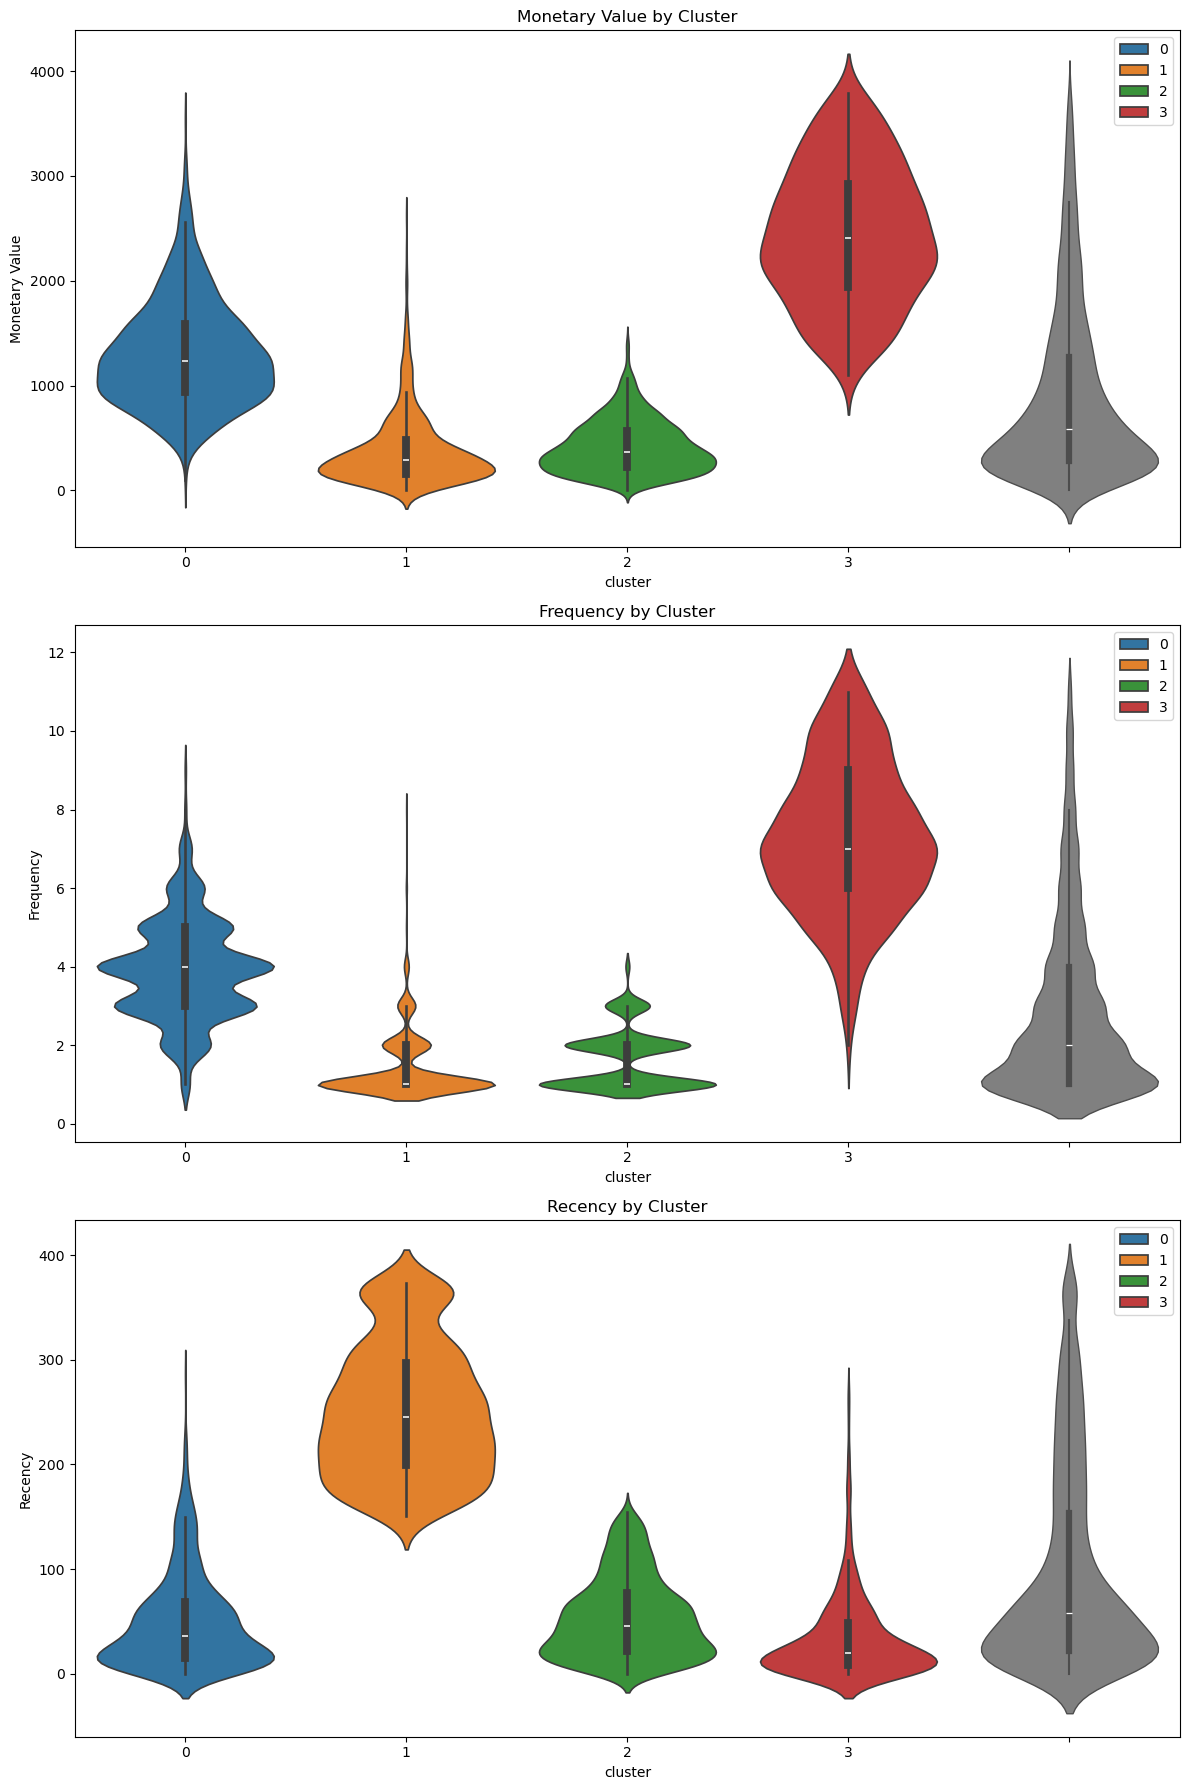

In [157]:
plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df['cluster'], y = non_outliers_df['monetaryvalue'], palette = cluster_colors, hue = non_outliers_df['cluster'])
sns.violinplot(y = non_outliers_df['monetaryvalue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_df['cluster'], y = non_outliers_df['frequency'], palette = cluster_colors, hue = non_outliers_df['cluster'])
sns.violinplot(y = non_outliers_df['frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_df['cluster'], y = non_outliers_df['recency'], palette = cluster_colors, hue = non_outliers_df['cluster'])
sns.violinplot(y = non_outliers_df['recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
   - Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

2. Cluster 1 (Orange): "Re-Engage"
   - Rationale: This group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
  
3. Cluster 2 (Green): "Nurture"
   - Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
  
4. Cluster 3 (Red): "Reward"
   - Rationale: This cluster included high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

In [163]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['cluster'] = -1
frequency_only_outliers['cluster'] = -2
monetary_and_frequency_outliers['cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,customerid,monetaryvalue,frequency,lastinvoicedate,recency,cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


<Figure size 1200x1800 with 0 Axes>

<Axes: >

<Axes: xlabel='cluster', ylabel='monetaryvalue'>

<Axes: xlabel='cluster', ylabel='monetaryvalue'>

Text(0.5, 1.0, 'Monetary Value by Cluster')

Text(0, 0.5, 'Monetary Value')

<Axes: >

<Axes: xlabel='cluster', ylabel='frequency'>

<Axes: xlabel='cluster', ylabel='frequency'>

Text(0.5, 1.0, 'Frequency by Cluster')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='cluster', ylabel='recency'>

<Axes: xlabel='cluster', ylabel='recency'>

Text(0.5, 1.0, 'Recency by Cluster')

Text(0, 0.5, 'Recency')

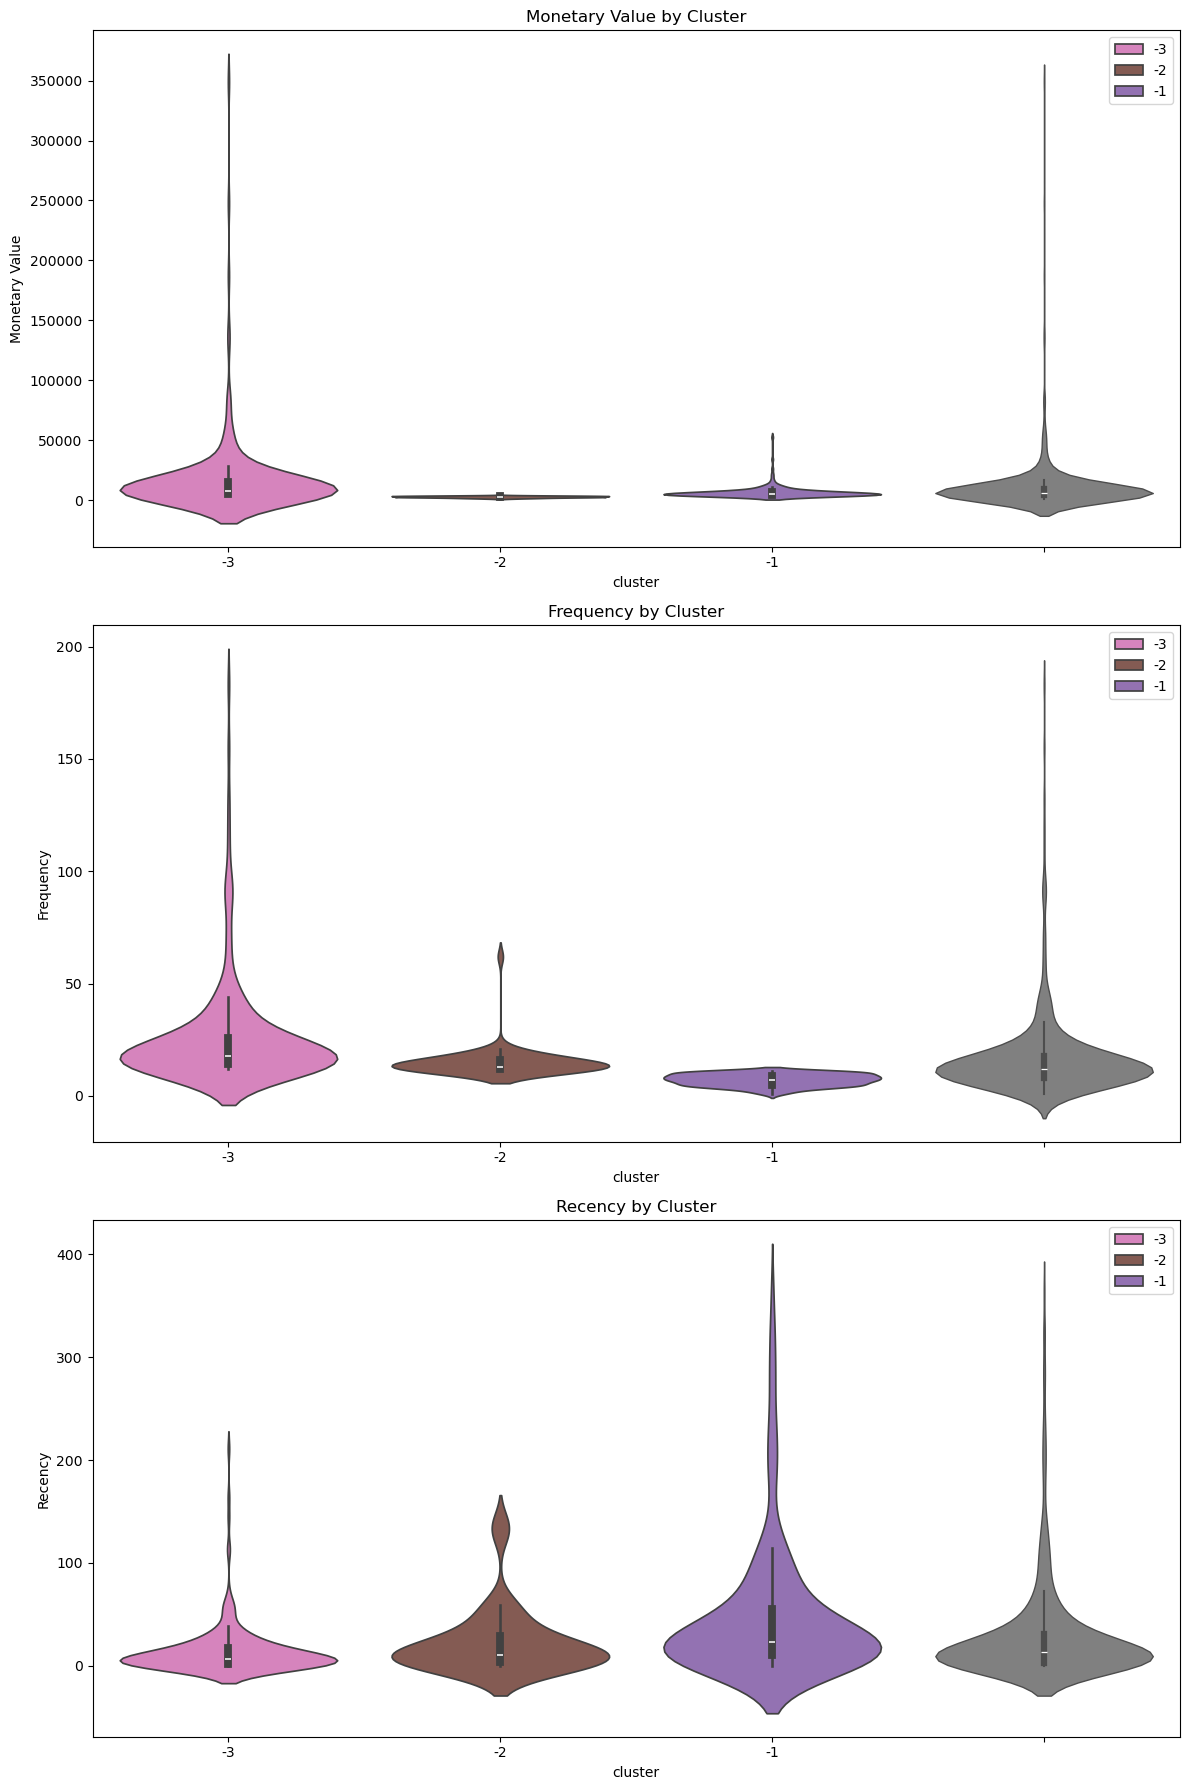

In [165]:
cluster_colors = {
    -1 : '#9467bd',
    -2 : '#8c564b',
    -3 : '#e377c2'
}

plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['monetaryvalue'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['monetaryvalue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['frequency'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['recency'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [167]:
cluster_labels = {
                    0 : "RETAIN",
                    1 : "RE-ENGAGE",
                    2 : "NURTURE",
                    3 : "REWARD",
                    -1 : "PAMPER",
                    -2 : "UPSELL",
                    -3 : "DELIGHT"
                }

In [169]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,customerid,monetaryvalue,frequency,lastinvoicedate,recency,cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [171]:
full_clustering_df['clusterlabel'] = full_clustering_df['cluster'].map(cluster_labels)
full_clustering_df

,customerid,monetaryvalue,frequency,lastinvoicedate,recency,cluster,clusterlabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


<Axes: xlabel='clusterlabel'>

Text(0, 0.5, 'Number of Customers')

Text(0.5, 1.0, 'Cluster Distribution with Average Feature Values')

<Axes: xlabel='clusterlabel'>

Text(0, 0.5, 'Average Value')

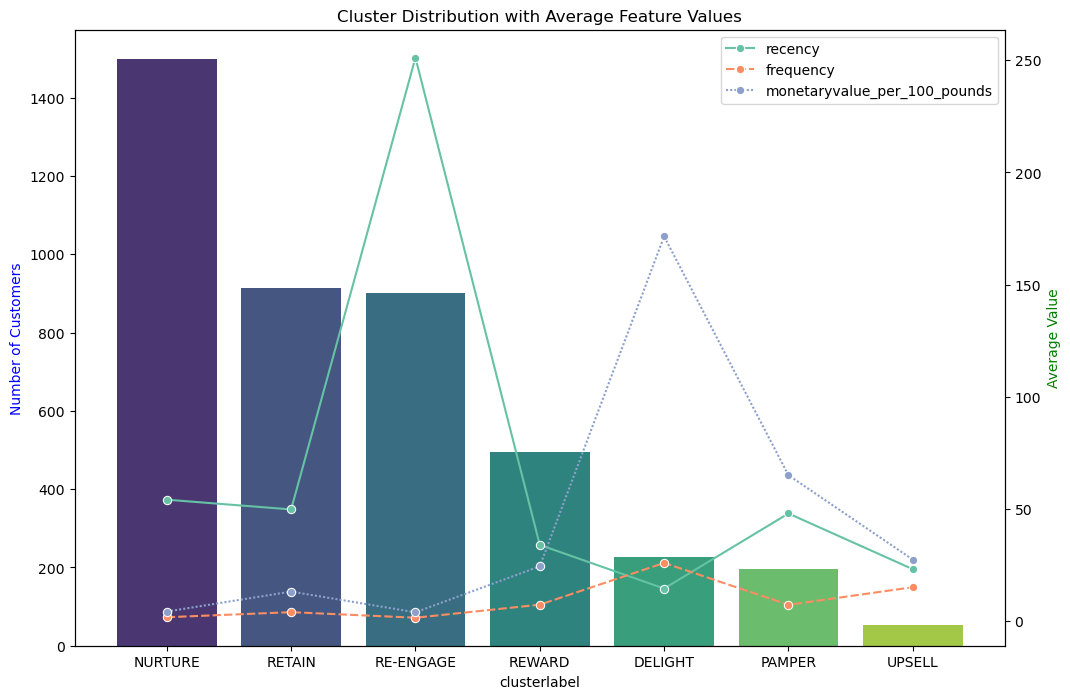

In [175]:
cluster_counts = full_clustering_df['clusterlabel'].value_counts()
full_clustering_df['monetaryvalue_per_100_pounds'] = full_clustering_df['monetaryvalue'] / 100.00
feature_means = full_clustering_df.groupby('clusterlabel')[['recency', 'frequency' , 'monetaryvalue_per_100_pounds']].mean()

fig, ax1 = plt.subplots(figsize = (12, 8))

sns.barplot( x = cluster_counts.index, y = cluster_counts.values, ax = ax1, palette = 'viridis', hue = cluster_counts.index)
ax1.set_ylabel('Number of Customers', color = 'b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data = feature_means, ax = ax2, palette = 'Set2', marker = 'o')
ax2.set_ylabel('Average Value', color = 'g')

plt.show()